In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import optuna
import joblib
import plotly
import psutil
import sklearn

In [2]:
datapath = r"E:\Quellen\Studenten\Gajewski\results\Hyperparameter Analyse\study.pkl"
with open(datapath, 'rb') as f:
    study = joblib.load(f)

In [3]:
print('Best trial: score {}, params {}'.format(study.best_value, study.best_params))

Best trial: score 264.08966249183413, params {'batch_size': 10, 'adam_learning_rate': 0.004372326152741302, 'actor_n_layers': 1, 'actor_n_units_L1': 214, 'critic_n_layers': 2, 'fc_layer_params_critic1': 365, 'fc_layer_params_critic2': 252, 'tf_agents_weights': True, 'gradient_steps': 75}


In [4]:
trials_df = study.trials_dataframe()
trials_df

number       value             datetime_start          datetime_complete  \
0        0   -0.065908 2020-12-01 18:27:58.536990 2020-12-01 18:39:42.995133   
1        1  179.398359 2020-12-01 18:39:42.995133 2020-12-01 18:47:14.972013   
2        2    2.022870 2020-12-01 18:47:14.972013 2020-12-01 18:55:07.655422   
3        3   -0.379097 2020-12-01 18:55:07.656465 2020-12-01 19:02:51.678491   
4        4    1.776489 2020-12-01 19:02:51.678491 2020-12-01 19:13:17.441199   
5        5   -0.065958 2020-12-01 19:13:17.442235 2020-12-01 19:21:37.642445   
6        6  179.840629 2020-12-01 19:21:37.642445 2020-12-01 19:28:42.372378   
7        7  219.808991 2020-12-01 19:28:42.372378 2020-12-01 19:36:26.711956   
8        8    1.795136 2020-12-01 19:36:26.711956 2020-12-01 19:43:42.970667   
9        9    1.899674 2020-12-01 19:43:42.970667 2020-12-01 19:51:43.958680   
10      10  179.462577 2020-12-01 19:51:43.958680 2020-12-01 19:59:30.401847   
11      11  177.998182 2020-12-01 19:59:30.403902 2020-12-01 20:06:38.692277   
12      12    1.705008 2020-12-01 20:06:38.692277 2020-12-01 20:14:44.257831   
13      13    1.240383 2020-12-01 20:14:44.257831 2020-12-01 20:21:48.903775   
14      14    1.899930 2020-12-01 20:21:48.903775 2020-12-01 20:28:52.425066   
15      15  264.089662 2020-12-01 20:28:52.426064 2020-12-01 20:36:07.007353   
16      16   -0.383808 2020-12-01 20:36:07.008354 2020-12-01 20:44:05.204304   
17      17  179.648636 2020-12-01 20:44:05.204304 2020-12-01 20:51:20.781920   
18      18    1.458704 2020-12-01 20:51:20.782870 2020-12-01 20:58:15.749476   
19      19         NaN 2020-12-01 20:58:15.757632                        NaT   

          duration  params_actor_n_layers  params_actor_n_units_L1  \
0  00:11:44.458143                      5                       90   
1  00:07:31.976880                      4                      345   
2  00:07:52.683409                      4                      142   
3  00:07:44.022026                      2                      208   
4  00:10:25.762708                      5                      366   
5  00:08:20.200210                      4                      474   
6  00:07:04.729933                      1                      256   
7  00:07:44.339578                      1                      161   
8  00:07:16.258711                      2                       57   
9  00:08:00.988013                      4                      447   
10 00:07:46.443167                      1                      173   
11 00:07:08.288375                      1                      266   
12 00:08:05.565554                      2                      252   
13 00:07:04.645944                      1                      320   
14 00:07:03.521291                      2                      128   
15 00:07:14.581289                      1                      214   
16 00:07:58.195950                      3                      205   
17 00:07:15.577616                      3                       63   
18 00:06:54.966606                      1                      130   
19             NaT                      2                      214   

    params_actor_n_units_L2  params_actor_n_units_L3  params_actor_n_units_L4  \
0                     358.0                    283.0                    428.0   
1                     410.0                    289.0                    367.0   
2                     301.0                    227.0                    229.0   
3                     109.0                      NaN                      NaN   
4                     367.0                    225.0                    137.0   
5                     435.0                    451.0                    206.0   
6                       NaN                      NaN                      NaN   
7                       NaN                      NaN                      NaN   
8                      82.0                      NaN                      NaN   
9                     283.0               

In [5]:
" a best score's history, blue dot is the score of this trial and orange line show the best score"
optuna.visualization.plot_optimization_history(study)

In [6]:
conda install -c plotly plotly-orca==1.2.1 psutil requests


Note: you may need to restart the kernel to use updated packages.



Solving environment: ...working... done

==> WARNING: A newer version of conda exists. <==

  current version: 4.8.3


# All requested packages already installed.

  latest version: 4.9.2

In [7]:
path = r"E:\Quellen\Studenten\Gajewski\results\Hyperparameter Analyse/"
datapath = os.path.join(path, "studyMADDPG_opt.pdf")
optuna.visualization.plot_optimization_history(study).write_image(datapath)

Please update conda by running

    $ conda update -n base -c defaults conda




In [8]:
" visualize how the pruning is executed"
optuna.visualization.plot_intermediate_values(study)


In [9]:
"see how the optuna's sampler searches hyperparameter space"
optuna.visualization.plot_slice(study)


In [10]:
optuna.visualization.plot_parallel_coordinate(study)


In [11]:
optuna.visualization.plot_param_importances(study)
datapath = os.path.join(path, "../../results/Hyperparameter Analyse/studyMADDPG_imp.pdf")
optuna.visualization.plot_param_importances(study).write_image(datapath)


In [12]:
trials_df.columns

Index(['number', 'value', 'datetime_start', 'datetime_complete', 'duration',
       'params_actor_n_layers', 'params_actor_n_units_L1',
       'params_actor_n_units_L2', 'params_actor_n_units_L3',
       'params_actor_n_units_L4', 'params_actor_n_units_L5',
       'params_adam_learning_rate', 'params_batch_size',
       'params_critic_n_layers', 'params_fc_layer_params_critic1',
       'params_fc_layer_params_critic2', 'params_fc_layer_params_critic3',
       'params_fc_layer_params_critic4', 'params_fc_layer_params_critic5',
       'params_gradient_steps', 'params_tf_agents_weights', 'state'],
      dtype='object')

In [29]:
params_actor_n_layers = trials_df['params_actor_n_layers'].values[:-1]
params_adam_learning_rate = trials_df['params_adam_learning_rate'].values[:-1]
params_fc_layer_params_critic1 = trials_df["params_fc_layer_params_critic1"].values[:-1]
value = trials_df['value'].values[:-1] 
actor_n_units_L1 = trials_df['params_actor_n_units_L1'].values[:-1] 
batch_size = trials_df['params_batch_size'].values[:-1] 

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
plt.rcParams["figure.figsize"] = (10,8)

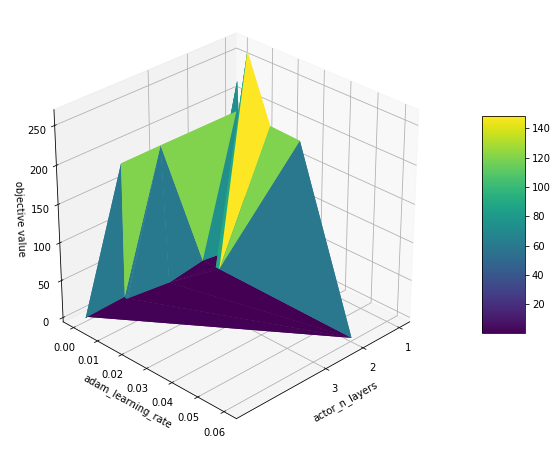

In [30]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(params_actor_n_layers, params_adam_learning_rate, value, cmap=plt.cm.viridis, linewidth=0.2)
ax.set(xlabel='actor_n_layers', ylabel='adam_learning_rate', zlabel='objective value')
ax.set_xticks([1,2,3])
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(params_actor_n_layers, params_adam_learning_rate, value, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Rotate it
ax.view_init(30, 45)
path = os.getcwd()
datapath = os.path.join(path, "../../results/Hyperparameter Analyse/actor_n_layers_vs_adam_learning_rate.pdf")
plt.savefig(datapath)
plt.show()

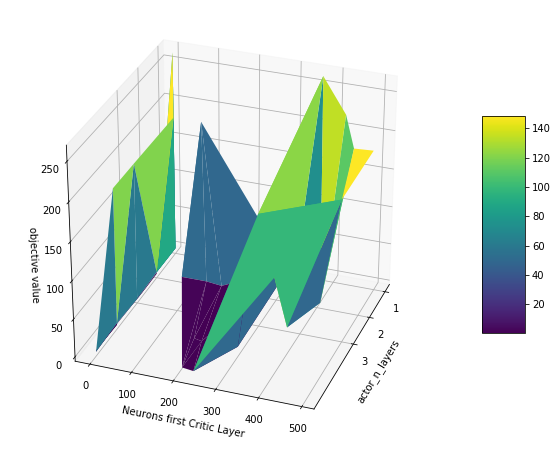

In [34]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(params_actor_n_layers, params_fc_layer_params_critic1, value, cmap=plt.cm.viridis, linewidth=0.2)
ax.set(xlabel='actor_n_layers', ylabel='Neurons first Critic Layer', zlabel='objective value')
ax.set_xticks([1,2,3])
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(params_actor_n_layers, params_adam_learning_rate, value, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Rotate it
ax.view_init(30, 20)
path = os.getcwd()
datapath = os.path.join(path, "../../results/Hyperparameter Analyse/actor_n_layers_vs_neuronen_first_critic.pdf")
plt.savefig(datapath)
plt.show()